In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#np.loadtxt -> to read csv file
#reshape -> dimension 
#shape -> 
#to convert image pixels from 0-255 into 0 to 1 it uses training data set divided by 255
#evaluate -> it evaluate testing data

In [28]:
x_train = np.loadtxt("C:/Users/91735/Downloads/cv_data/input.csv",delimiter=",")
y_trian = np.loadtxt("C:/Users/91735/Downloads/cv_data/labels.csv",delimiter=",")
x_test = np.loadtxt("C:/Users/91735/Downloads/cv_data/input_test.csv",delimiter=",")
y_test = np.loadtxt("C:/Users/91735/Downloads/cv_data/labels_test.csv",delimiter=",")



In [29]:
x_train = x_train/255.0  #to display the image pixel in 0 to 1 format
x_test = x_test/255.0 

In [30]:
#actual shape to understand easily
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_trian.reshape(len(x_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [31]:
print(x_train.shape)
print(y_trian.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000,)
(400, 100, 100, 3)
(400, 1)


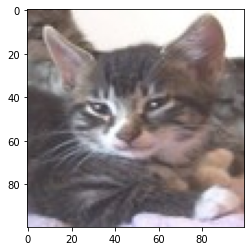

In [78]:
#print random image in trainng dataset using random builtin
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [79]:
#model using sequential
model = Sequential()

In [80]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#32 is the filter and (3,3) is the size of filter

In [82]:
model.add(Flatten())                            #it connverts multidimesion vector into single dimension vector
model.add(Dense(64,activation='relu'))          #here 64 is the neurons
model.add(Dense(1,activation='sigmoid'))        #last 1 neuron for output

In [86]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 15s 477ms/step - loss: 0.4291 - accuracy: 0.8025
Epoch 2/5
32/32 [==============================] - 15s 478ms/step - loss: 0.3949 - accuracy: 0.8310
Epoch 3/5
32/32 [==============================] - 15s 481ms/step - loss: 0.3617 - accuracy: 0.8435
Epoch 4/5
32/32 [==============================] - 15s 481ms/step - loss: 0.3400 - accuracy: 0.8605
Epoch 5/5
32/32 [==============================] - 16s 496ms/step - loss: 0.2975 - accuracy: 0.8755


In [114]:
model.evaluate(x_test,y_test)            #it evaluate the tesing data

13/13 [==============================] - 1s 76ms/step - loss: 0.6127 - accuracy: 0.7000


[0.6127467155456543, 0.699999988079071]

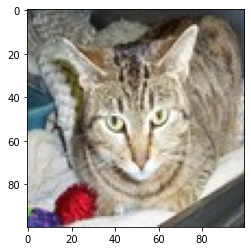

[[0.9830688]]
our model says it is a  Cat


In [161]:
idx2 = random.randint(0,len(y_test))       #making predictive
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))   #here 1 for value return
print(y_pred)

y_pred = y_pred>0.5
if(y_pred==0):
    pred='Dog'
else:
    pred='Cat'
    
print("our model says it is a ",pred)